**Step 1: Load the Dataset**

Use pandas to read the Excel file.

In [ ]:
import pandas as pd
# Load the Excel dataset
df = pd.read_excel("Global Superstore.xlsx")

**Step 2: Handle Missing Values**

1. Check for Missing Values:
2. Fill Missing Values:
For numerical columns: Fill with mean or median.
For categorical columns: Fill with placeholders like "Unknown".
3. Drop Remaining Rows with Missing Values:
If any missing values remain, remove the affected rows.
Remove rows with missing values:

In [ ]:
# Step 2: Handle Missing Values
# Fill numerical columns with the mean
numerical_cols = ['Sales', 'Profit']  # Replace with your actual numerical column names
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

# Fill categorical columns with a placeholder
categorical_cols = ['Region', 'Category']  # Replace with your actual categorical column names
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna("Unknown")

# Drop remaining rows with missing values if any
df = df.dropna()

# Verify no missing values remain
print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


**Step 3: Remove duplicate rows**

Remove the rows with duplicate values.

In [ ]:
# Step 3: Remove Duplicates
df = df.drop_duplicates()

**Step 4: Handle Outliers Using Z-scores**

Drop Z-score helper columns

In [ ]:
# Step 4: Handle Outliers
# Using Interquartile Range (IQR)
from scipy.stats import zscore
for col in numerical_cols:  # Perform outlier handling for each numerical column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Using Z-scores to remove extreme outliers (optional, in case additional filtering is required)
for col in numerical_cols:
    df[f'z_score_{col}'] = zscore(df[col])
    df = df[df[f'z_score_{col}'].abs() < 3]

# Drop Z-score helper columns
z_score_cols = [f'z_score_{col}' for col in numerical_cols]
df = df.drop(z_score_cols, axis=1)

# Step 5: Save the Cleaned Dataset
df.to_excel("Cleaned_Global_Superstore.xlsx", index=False)

print("Data cleaning completed. Cleaned dataset saved as 'Cleaned_Global_Superstore.xlsx'.")

Data cleaning completed. Cleaned dataset saved as 'Cleaned_Global_Superstore.xlsx'.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel("Cleaned_Global_Superstore.xlsx")

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,33418,CA-2014-158246,2014-11-10,2014-11-12,First Class,JB-15400,Jennifer Braxton,Corporate,Sunnyvale,California,...,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",215.9760,3,0.20,-2.6997,106.81,Critical
1,40006,CA-2011-119144,2011-11-16,2011-11-18,First Class,JD-16150,Justin Deggeller,Corporate,Los Angeles,California,...,FUR-BO-10004015,Furniture,Bookcases,"Bush Andora Bookcase, Maple/Graphite Gray Finish",305.9745,3,0.15,25.1979,99.30,Critical
2,31591,CA-2011-111451,2011-12-26,2011-12-28,First Class,KL-16555,Kelly Lampkin,Corporate,Colorado Springs,Colorado,...,FUR-CH-10001891,Furniture,Chairs,Global Deluxe Office Fabric Chairs,230.3520,3,0.20,20.1558,87.27,Critical
3,34586,CA-2012-157770,2012-12-13,2012-12-15,First Class,RD-19585,Rob Dowd,Consumer,Temecula,California,...,TEC-AC-10001552,Technology,Accessories,Logitech K350 2.4Ghz Wireless Keyboard,248.8500,5,0.00,27.3735,83.43,Critical
4,37759,US-2014-133361,2014-05-15,2014-05-18,First Class,AJ-10780,Anthony Jacobs,Corporate,Baltimore,Maryland,...,FUR-CH-10003298,Furniture,Chairs,Office Star - Contemporary Task Swivel chair w...,261.9600,2,0.00,23.5764,77.11,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7132,38414,CA-2011-143168,2011-10-18,2011-10-23,Second Class,IG-15085,Ivan Gibson,Consumer,Seattle,Washington,...,OFF-BI-10003784,Office Supplies,Binders,Computer Printout Index Tabs,1.3440,1,0.20,0.4704,0.03,Medium
7133,31558,US-2014-155299,2014-06-09,2014-06-13,Standard Class,Dl-13600,Dorris liebe,Corporate,Pasadena,Texas,...,OFF-AP-10002203,Office Supplies,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.6240,2,0.80,-4.4660,0.02,Medium
7134,37361,CA-2012-111780,2012-12-25,2012-12-30,Second Class,RA-19285,Ralph Arnett,Consumer,San Diego,California,...,OFF-PA-10001667,Office Supplies,Paper,Great White Multi-Use Recycled Paper (20Lb. an...,17.9400,3,0.00,8.0730,0.02,High
7135,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.4440,1,0.80,-1.1100,0.01,Medium


**Step 5: Compute Basic Statistical Measures Mean, Median, Standard Deviation, and Variance:**

For numerical columns, calculate these metrics.

**Summary Statistics for All Numerical Columns:** Use the describe() method for a quick overview.

In [ ]:
# Numerical columns
cols = ['Sales', 'Profit']  # Replace with actual numerical column names

for col in cols:
    print(f"Statistics for {col}:")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Variance: {df[col].var()}")
    print("\n")

Statistics for Sales:
Mean: 51.86267347625053
Median: 28.782
Standard Deviation: 59.614033028328514
Variance: 3553.832933902643


Statistics for Profit:
Mean: 9.130126789967772
Median: 6.566999999999998
Standard Deviation: 13.230050099735138
Variance: 175.03422564150173




In [ ]:
print(df[numerical_cols].describe())

             Sales       Profit
count  7137.000000  7137.000000
mean     51.862673     9.130127
std      59.614033    13.230050
min       0.444000   -27.735000
25%      12.585000     2.067200
50%      28.782000     6.567000
75%      68.112000    15.525000
max     308.499000    49.604800


**Step 6: Compute Correlations Between Variables:**

Correlations help study the relationship between numerical variables:

Correlation Matrix: Compute pairwise correlations between all numerical columns.

In [ ]:
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           Sales    Profit
Sales   1.000000  0.562215
Profit  0.562215  1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

**Step 7: Visualize Data**
1. Use Histograms to Explore Distributions
Histograms show the frequency distribution of numerical columns.
2. Use Boxplots to Identify Outliers
Boxplots help identify outliers in continuous variables.
3. Use Heatmaps to Visualize Correlations
Heatmaps provide a visual representation of correlations between numerical features.

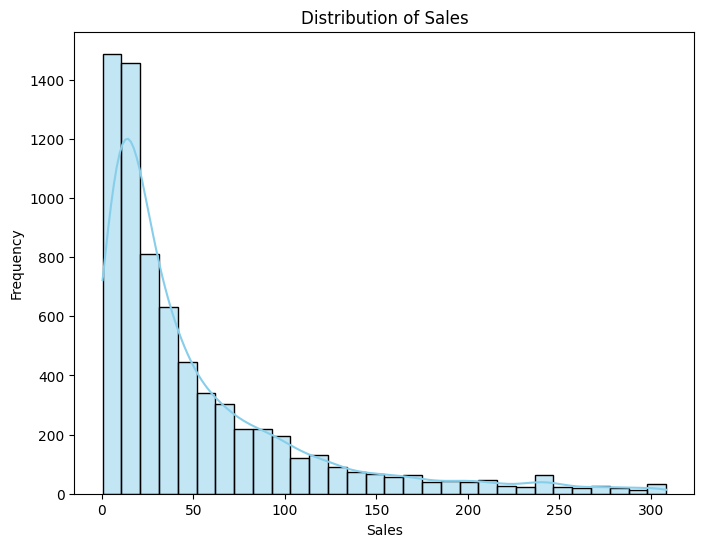

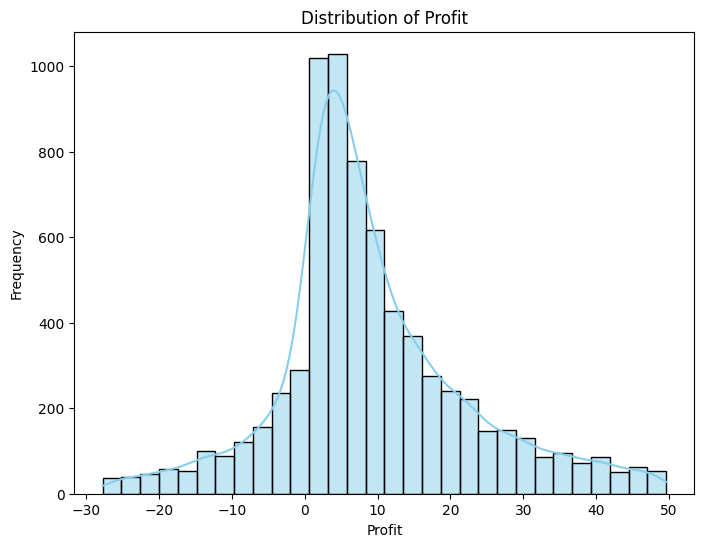

In [ ]:
# Define numerical columns
numerical_cols = ['Sales', 'Profit']  # Replace with your numerical column names

# Plot histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

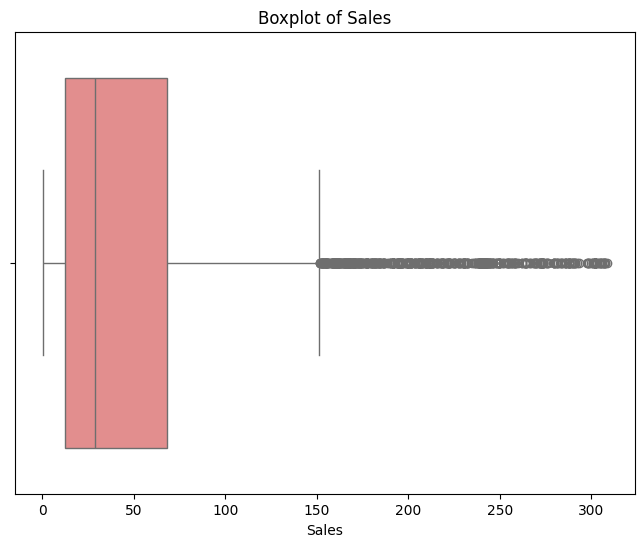

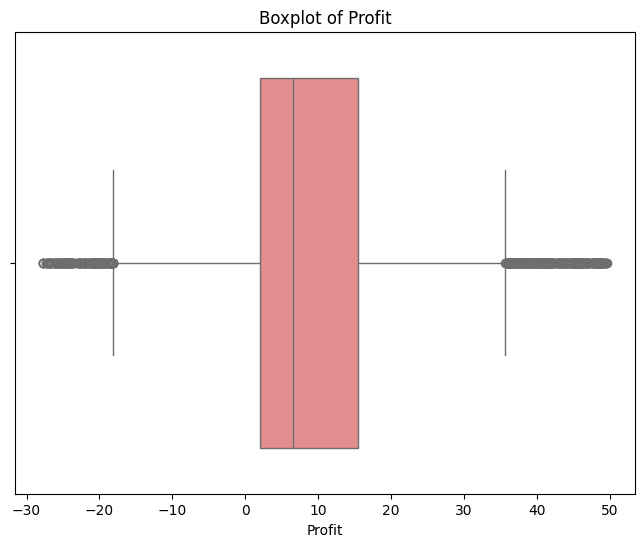

In [ ]:
# Plot boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

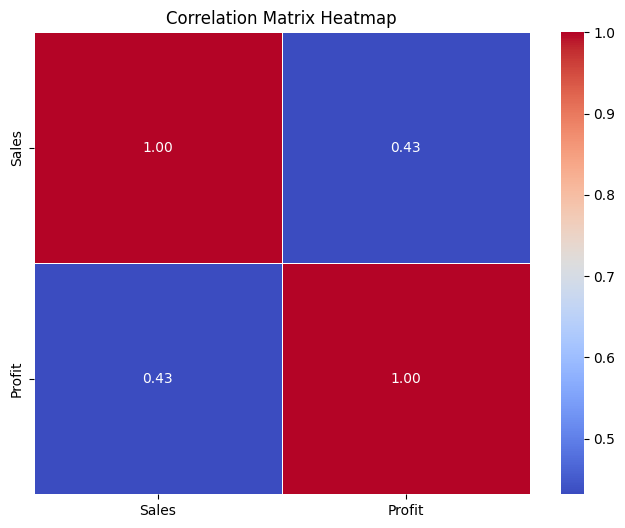

In [ ]:
# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()